In [1]:
from keras.applications import VGG19
from keras.models import Model
from keras import models
import os
import matplotlib.pyplot as plt

os.environ['CUDA_VISIBLE_DEVICES']='0'
image_size=224

base_model = VGG19(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
#vgg_conv = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)
base_model.summary()
# # 冻结所有层
# for layer in vgg_conv.layers[:]:
#     layer.trainable = False
# vgg_conv.layers[-5].trainable = True
# vgg_conv.layers[-6].trainable = True
# vgg_conv.layers[-7].trainable = True
# vgg_conv.layers[-8].trainable = True
# vgg_conv.layers[-1].trainable = True
# vgg_conv.layers[-2].trainable = True
# vgg_conv.layers[-3].trainable = True
# # 检查每一层trainable属性的状态
# for layer in vgg_conv.layers:
#     print(layer, layer.trainable)
from keras import models
from keras import layers
from keras import optimizers

# 创建模型
model = models.Sequential()
# 添加vgg卷积基本模型
model.add(base_model)
# 添加新的层
# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(2, activation='softmax'))  # softmax用于分类的激活函数
model.add(layers.AveragePooling2D(input_shape=(7,7,512), pool_size=(7, 7)))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))
# 显示网络的summary
model.summary()

Using TensorFlow backend.
/home/yangtianyun/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yangtianyun/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yangtianyun/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yangtianyun/anaconda3/lib/python3.7

Instructions for updating:
Colocations handled automatically by placer.
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________________________________

In [2]:
from keras.callbacks import Callback
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x1, y1,x2,y2 = self.test_data
        loss, acc = self.model.evaluate(x1, y1, verbose=0)
        print('\nValidation loss: {}, acc: {}\n'.format(loss, acc))
        loss, acc = self.model.evaluate(x2, y2, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

In [3]:
import numpy as np
from keras.utils import to_categorical
imgs_rumor=np.load('val_imgs_rumor.npy')
imgs_nonrumor=np.load('val_imgs_nonrumor.npy')
X_val=np.concatenate([imgs_rumor,imgs_nonrumor])
label=np.concatenate([np.ones([1000,1]),np.zeros([1000,1])])
Y_val = to_categorical(label)

imgs_rumor=np.load('test_imgs_rumor.npy')
imgs_nonrumor=np.load('test_imgs_nonrumor.npy')
X_test=np.concatenate([imgs_rumor,imgs_nonrumor])
label=np.concatenate([np.ones([448,1]),np.zeros([519,1])])
Y_test = to_categorical(label)

imgs_rumor=np.load('train_imgs_rumor.npy')
imgs_nonrumor=np.load('train_imgs_nonrumor.npy')
X_train=np.concatenate([imgs_rumor,imgs_nonrumor])
label=np.concatenate([np.ones([7955,1]),np.zeros([7715,1])])
Y_train= to_categorical(label)

## 注意，这里的accuracy是在batch上计算的，不能代表真实的accuracy
https://zhuanlan.zhihu.com/p/51356820
https://github.com/keras-team/keras/issues/2548

Instructions for updating:
Use tf.cast instead.


/home/yangtianyun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 15670 samples, validate on 2000 samples
Epoch 1/10
15670/15670 [==============================] - 107s 7ms/step - loss: 0.6300 - accuracy: 0.6665 - val_loss: 0.6108 - val_accuracy: 0.6560

Epoch 00001: val_loss improved from inf to 0.61077, saving model to checkpoint-01e-val_accuracy_0.6560.hdf5

Validation loss: 0.6107726457118988, acc: 0.656000018119812


Testing loss: 0.6876756505118038, acc: 0.6059979200363159

Epoch 2/10
15670/15670 [==============================] - 93s 6ms/step - loss: 0.4746 - accuracy: 0.7684 - val_loss: 0.4322 - val_accuracy: 0.7830

Epoch 00002: val_loss improved from 0.61077 to 0.43223, saving model to checkpoint-02e-val_accuracy_0.7830.hdf5

Validation loss: 0.4322259073257446, acc: 0.7829999923706055


Testing loss: 0.5818229266196767, acc: 0.6794208884239197

Epoch 3/10
15670/15670 [==============================] - 93s 6ms/step - loss: 0.3873 - accuracy: 0.8190 - val_loss: 0.3880 - val_accuracy: 0.8215

Epoch 00003: val_loss improved from 0.432

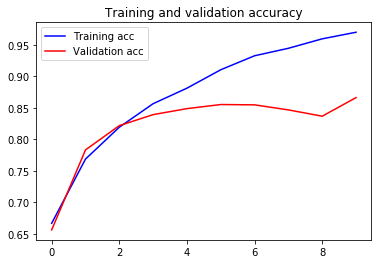

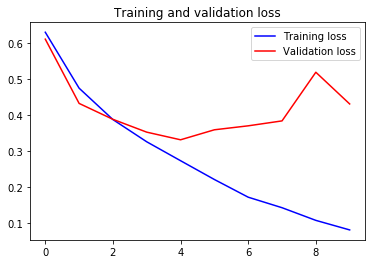

In [5]:
# 验证数据的数据生成器
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import SGD

# 编译模型
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="checkpoint-{epoch:02d}e-val_accuracy_{val_accuracy:.4f}.hdf5", save_best_only=False, verbose=1,period=1)
# 训练模型
# history = model.fit_generator(train_generator, steps_per_epoch=train_generator.samples/train_generator.batch_size, epochs=15, validation_data=validation_generator, validation_steps=validation_generator.samples/validation_generator.batch_size, verbose=1, callbacks=[checkpointer,TestCallback((X_val, Y_val, X_test, Y_test))])

history = model.fit(X_train, Y_train,
              batch_size=64,
              nb_epoch=10,
              shuffle=True,
              verbose=1,
              validation_data=(X_val, Y_val),
              callbacks=[checkpointer,TestCallback((X_val, Y_val, X_test, Y_test))])


# 显示正确率和损失曲线
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [4]:
from keras.applications import VGG16
from keras.models import Model
from keras.models import load_model

model = load_model('checkpoint-05e-val_accuracy_0.8485.hdf5')

Instructions for updating:
Use tf.cast instead.


/home/yangtianyun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 15670 samples, validate on 2000 samples
Epoch 1/10
15670/15670 [==============================] - 105s 7ms/step - loss: 0.2264 - accuracy: 0.9052 - val_loss: 0.3308 - val_accuracy: 0.8655

Epoch 00001: saving model to checkpoint-01e-val_accuracy_0.8655.hdf5

Validation loss: 0.3307548121213913, acc: 0.8654999732971191


Testing loss: 0.5706709343188797, acc: 0.7766287326812744

Epoch 2/10
15670/15670 [==============================] - 92s 6ms/step - loss: 0.1777 - accuracy: 0.9288 - val_loss: 0.3315 - val_accuracy: 0.8675

Epoch 00002: saving model to checkpoint-02e-val_accuracy_0.8675.hdf5

Validation loss: 0.33153477585315705, acc: 0.8675000071525574


Testing loss: 0.6085233139769861, acc: 0.7580145001411438

Epoch 3/10
15670/15670 [==============================] - 92s 6ms/step - loss: 0.1346 - accuracy: 0.9479 - val_loss: 0.3453 - val_accuracy: 0.8660

Epoch 00003: saving model to checkpoint-03e-val_accuracy_0.8660.hdf5

Validation loss: 0.345337815284729, acc: 0.86599999

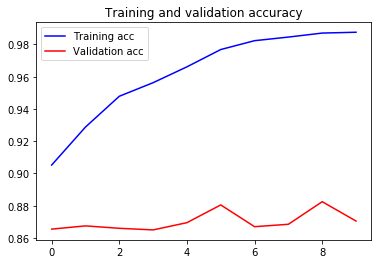

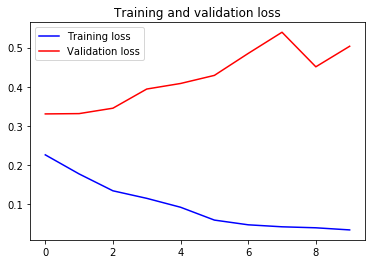

In [5]:
# 验证数据的数据生成器
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import SGD

# 编译模型
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="checkpoint-{epoch:02d}e-val_accuracy_{val_accuracy:.4f}.hdf5", save_best_only=False, verbose=1,period=1)

history = model.fit(X_train, Y_train,
              batch_size=64,
              nb_epoch=10,
              shuffle=True,
              verbose=1,
              validation_data=(X_val, Y_val),
              callbacks=[checkpointer,TestCallback((X_val, Y_val, X_test, Y_test))])


# 显示正确率和损失曲线
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()